In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'March 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29
2019-03-31     2938   2223         86   2   0     9    149     190      28

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-03-31       13      1        -56  -6   0     5     53      11      -1

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

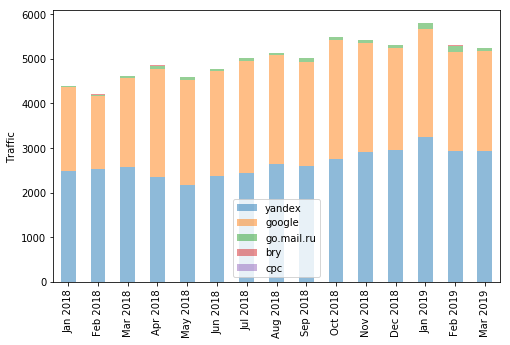

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

<h3>Линейная диаграмма изменений трафика</h3>

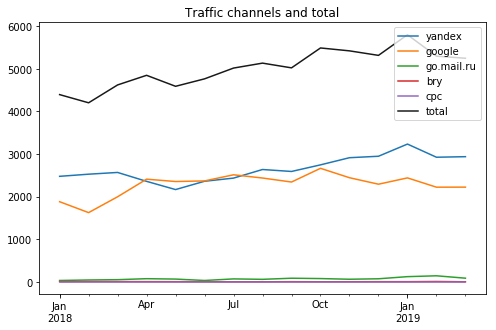

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)     86
google     0                                         дешевые двери    273
           1                                          двери дешево    227
           2                                       двери из дерева    118
           3                                      np - /?pid=pokaz     79
           4                             np - /?cnt=catalog&r=1428     72
           5                             np - /?cnt=catalog&r=2438     65
           6                                                np - /     31
           7                                         полотно двери     27
           8                                дверные полотна купить     22
           9                                         двери продажа     15
           10                                      недорогие двери     14
           11                                   np - /?pid=contact     13
           12                                       двери в ванную      9
           13                                     двери с коробкой      8
           14                               дверное полотно купить      8
           15                            np - /?cnt=catalog&r=3124      7
           16                              np - /?pid=menu-katalog      7
           17                                      дверное полотно      7
           18                               дверное полотно дешево      6
           19                                      полотна дверные      4
           20                            np - /?cnt=catalog&r=1318      3
           21                             np - /?cnt=catalog&r=300      3
           22                                 дверное полотно цена      3
           23                                    полотно для двери      3
           24                            np - /?cnt=catalog&r=1010      2
           25                             np - /?cnt=catalog&r=114      2
           26                            np - /?cnt=catalog&r=2555      2
           27                            np - /?cnt=catalog&r=3134      2
           28                             np - /?cnt=catalog&r=473      2
...                                                            ...    ...
yandex     2059                       bravo двери официальный сайт      1
           2060     brp аксессуары для дверей sport aluminum doors      1
           2061             bussare дверные ручки официальный сайт      1
           2062                             by3564 полотно дверное      1
           2063        call of cthulhu как взломать дверь на склад      1
           2064                           castorama каталог дверей      1
           2065  centr dver mineevyandex ru межкомнатные двери ...      1
           2066  chester двери купить межкомнатную дверь честер...      1
           2067  citroen peugeot9046.48 втулка направляющая зам...      1
           2068  classic двери рамочной конструкцией подойдут ц...      1
           2069  cliff двери классические межкомнатные двери фо...      1
           2070                           compack дверной механизм      1
           2071                 compact living механизм для дверей      1
           2072                       credo двери официальный сайт      1
           2073               dali special эмаль для окон и дверей      1
           2074                       dali эмаль для окон и дверей      1
           2075        dali эмаль для окон и дверей в леруа мерлен      1
           2076                          deco doors двери гармошка      1
           2077  decore profi краска каталог полотна дверного н...      1
           2078  deus ex human revolution the missing link двер...      1
           2079                    diodoors двери официальный сайт      1
           2080                 dnd ручки дверные официальный сайт      1
           2081     doorhan доборы ламинированные дверные полот

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),86
google,дешевые двери,273
yahoo,np - /?cnt=catalog&r=1428,1
yandex,дверь гармошка,98


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                              (not set)     86
google     0                          дешевые двери    273
           1                           двери дешево    227
           2                        двери из дерева    118
           3                       np - /?pid=pokaz     79
           4              np - /?cnt=catalog&r=1428     72
yahoo      1              np - /?cnt=catalog&r=2438      1
           0              np - /?cnt=catalog&r=1428      1
yandex     6                         дверь гармошка     98
           0                              (not set)     88
           7                         двери гармошка     67
           8                        дверное полотно     43
           9  двери гармошка в леруа мерлен каталог     29